# PyTorch Transformers

We need to compare if the NVD CVE description matches text from web scraping per HTML tag. Unfortunately, messy but fast enough for what I need



In [1]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

## Reference

[Semantic Similarity Using Transformers](https://towardsdatascience.com/semantic-similarity-using-transformers-8f3cb5bf66d6)



In [2]:
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')


In [3]:
sentence1 = "I like Python because I can build AI applications"
sentence2 = "I like Python because I can do data analytics"
# encode sentences to get their embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)
# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print("Sentence 1:", sentence1)
print("Sentence 2:", sentence2)
print("Similarity score:", cosine_scores.item())

Sentence 1: I like Python because I can build AI applications
Sentence 2: I like Python because I can do data analytics
Similarity score: 0.8461101055145264


In [4]:
nvd_description = """CVE-2023-35141. In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint by opening a context menu."""

html_description = """BERT for Sentence Similarity. So far, so good, but these transformer models had on"""

In [5]:
# encode sentences to get their embeddings
embedding1 = model.encode(nvd_description, convert_to_tensor=True)
embedding2 = model.encode(html_description, convert_to_tensor=True)
# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print("Similarity score:", cosine_scores.item())

Similarity score: 0.010038269683718681


In [6]:
section = """Descriptions 
Descriptions 
CSRF protection bypass vulnerability 
SECURITY-3135 / CVE-2023-35141
Severity (CVSS): High
Description:
Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.

In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.

As of publication of this advisory, we are aware of insufficiently escaped context menu URLs for label expressions, allowing attackers with Item/Configure permissions to exploit this vulnerability.

Jenkins 2.400, LTS 2.401.1 sends GET requests to load the list of context actions.

SSL/TLS certificate validation disabled by default in Checkmarx Plugin 
SECURITY-2870 / CVE-2023-35142
Severity (CVSS): Medium
Affected plugin: checkmarx
Description:
Checkmarx Plugin allows to globally enable or disable SSL/TLS validation for connections to the Checkmarx server. Checkmarx Plugin 2022.4.3 and earlier disables it by default. Unless changed by an administrator, it would cause all connections to the Checkmarx server to ignore SSL/TLS validation, thereby enabling potential man-in-the-middle attacks.

Checkmarx Plugin 2023.2.6 enables SSL/TLS validation by default. Administrators who do not want SSL/TLS validation for connections to the Checkmarx server to be disabled are advised to review their configuration.

Missing permission checks in Team Concert Plugin 
SECURITY-2932 / CVE-2023-3315
Severity (CVSS): Medium
Affected plugin: teamconcert
Description:
Team Concert Plugin 2.4.1 and earlier does not perform permission checks in methods implementing form validation.

This allows attackers with Overall/Read permission to check for the existence of an attacker-specified file path on the Jenkins controller file system.

Team Concert Plugin 2.4.2 requires Overall/Administer permission for the affected form validation methods.

Missing permission check in Dimensions Plugin allows enumerating credentials IDs 
SECURITY-3138 / CVE-2023-32261
Severity (CVSS): Medium
Affected plugin: dimensionsscm
Description:
Dimensions Plugin 0.9.3 and earlier does not perform a permission check in an HTTP endpoint.

This allows attackers with Overall/Read permission to enumerate credentials IDs of credentials stored in Jenkins. Those can be used as part of an attack to capture the credentials using another vulnerability.

An enumeration of credentials IDs in Dimensions Plugin 0.9.3.1 requires the appropriate permissions.

Exposure of system-scoped credentials in Dimensions Plugin 
SECURITY-3143 / CVE-2023-32262
Severity (CVSS): Medium
Affected plugin: dimensionsscm
Description:
Dimensions Plugin 0.9.3 and earlier does not set the appropriate context for credentials lookup, allowing the use of System-scoped credentials otherwise reserved for the global configuration.

This allows attackers with Item/Configure permission to access and capture credentials they are not entitled to.

Dimensions Plugin 0.9.3.1 defines the appropriate context for credentials lookup.
""".split('\n')

section

['Descriptions ',
 'Descriptions ',
 'CSRF protection bypass vulnerability ',
 'SECURITY-3135 / CVE-2023-35141',
 'Severity (CVSS): High',
 'Description:',
 'Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.',
 '',
 'In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.',
 '',
 'As of publication of this advisory, we are aware of insufficiently escaped context menu URLs for label expressions, allowing attackers with Item/Configure permissions to exploit this vulnerability.',
 '',
 'Jenkins 2.400, LTS 2.401.1 sends GET requests to load the list of context actions.',
 '',
 'SSL/TLS certificate validation disabled by default in Checkmarx Plugin ',
 'SECURITY-2870 / C

In [7]:
scores = []
for i, line in enumerate(section):
    if line:
        embedding2 = model.encode(line, convert_to_tensor=True)
        # compute similarity scores of two embeddings
        cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
        print(i, ' - ', cosine_scores, line)
        scores.append((i, cosine_scores))

0  -  tensor([[0.0953]]) Descriptions 
1  -  tensor([[0.0953]]) Descriptions 
2  -  tensor([[0.2337]]) CSRF protection bypass vulnerability 
3  -  tensor([[0.4951]]) SECURITY-3135 / CVE-2023-35141
4  -  tensor([[0.1968]]) Severity (CVSS): High
5  -  tensor([[0.1511]]) Description:
6  -  tensor([[0.4006]]) Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.
8  -  tensor([[0.8899]]) In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.
10  -  tensor([[0.5051]]) As of publication of this advisory, we are aware of insufficiently escaped context menu URLs for label expressions, allowing attackers with Item/Configure permissions to exploit this vulnerability.
12  -  tenso

What I will do is look at the sentence/tag with the highest score (if the score is above 80%). I will grab the paragraph text above and below that tag (3 tags in total). THen return that data as the article.


So let's demo this


In [8]:
"""
Vendor Articles from CVEs
"""

import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

spaces_pattern = re.compile('\s+') # remove new lines \n and \t

URL = "https://www.jenkins.io/security/advisory/2023-06-14/"



def request_articles(url_list):
    soup_list = []
    for url in url_list:
        soup = beautiful_request(url)
        soup_list.append(soup)
    return request_articles


def beautiful_request(url):
    response = requests.get(url = url, timeout=(4, 5))
    # Before passing response.text to Beautifulsoup
    # we need to remove any \n that are within sentences and
    # unrelated to HTML new lines
    soup = BeautifulSoup(response.text.replace('.\n', '. '))
    # does this after is trickier...or at least requires more thought
    # this is faster for now...
    return soup


def spaces_filter(text_list):
    # ['this', ' ', ' ', 'that', 'this']
    return len(text_list) > 0


def word_count(text):
    text_list = text.split(' ') # get rid of extra spaces so they don't count
    text_list = list(filter(spaces_filter, text_list))
    return len(text_list)


def word_count_filter(text):
    n = word_count(text)
    return n > 3


def text_prep(soup):
    # we get all this html code, let's just grab the text
    text = soup.text.split('\n')
    #text # we get a lot of empty junk, so filter it out
    text = list(filter(spaces_filter, text))
    text = list(filter(word_count_filter, text)) # should I combine this with the above?
    text_list = text
    return text_list

def remove_newlines(text):
    # remove \n and \t
    text = re.sub(spaces_pattern, ' ', text)
    return text


def find_text_similarity(nvd_description, text_list):
    embedding1 = model.encode(nvd_description, convert_to_tensor=True)
    scores = []
    for i, line in enumerate(text_list):
        embedding2 = model.encode(line, convert_to_tensor=True)
        # compute similarity scores of two embeddings
        cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
        scores.append(float(cosine_scores))
    return scores


def fetch_relevant_text(scores, text_list):
    idx = pd.Series(scores).idxmax()
    # fetch the relevant text
    rel_text = text_list[max(0, idx-2):min(len(text_list), idx+3)]
    return rel_text, idx

In [9]:
response = requests.get(url = URL, timeout=(4, 5))
htmltext = response.text.replace('.\n', '. ')

In [10]:
soup = BeautifulSoup(htmltext)
text_list = text_prep(soup)

In [11]:
text_list

['Jenkins Security Advisory 2023-06-14',
 'How We Fix Security Issues',
 'Jenkins Security Advisory 2023-06-14',
 'This advisory announces vulnerabilities in the following Jenkins deliverables:',
 'Digital.ai App Management Publisher',
 'CSRF protection bypass vulnerability',
 'Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.',
 'In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.',
 'As of publication of this advisory, we are aware of insufficiently escaped context menu URLs for label expressions, allowing attackers with Item/Configure permissions to exploit this vulnerability.',
 'Jenkins 2.400, LTS 2.401.1 sends GET requests to load the list of context actio

In [12]:
# we need to match with this description
nvd_description = """CVE-2023-35141. In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint by opening a context menu."""

In [13]:
embedding1 = model.encode(nvd_description, convert_to_tensor=True)

In [14]:
scores = []
for i, line in enumerate(text_list[:50]):
    embedding2 = model.encode(line, convert_to_tensor=True)
    # compute similarity scores of two embeddings
    cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
    print(i, ' - ', cosine_scores, line)
    scores.append((i, cosine_scores))

0  -  tensor([[0.5479]]) Jenkins Security Advisory 2023-06-14
1  -  tensor([[0.2241]]) How We Fix Security Issues
2  -  tensor([[0.5479]]) Jenkins Security Advisory 2023-06-14
3  -  tensor([[0.5030]]) This advisory announces vulnerabilities in the following Jenkins deliverables:
4  -  tensor([[0.0223]]) Digital.ai App Management Publisher
5  -  tensor([[0.2337]]) CSRF protection bypass vulnerability
6  -  tensor([[0.4006]]) Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.
7  -  tensor([[0.8899]]) In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.
8  -  tensor([[0.5051]]) As of publication of this advisory, we are aware of insufficiently escaped context menu UR

In [15]:
scores = find_text_similarity(nvd_description=nvd_description, text_list=text_list)
scores

[0.547927975654602,
 0.22405001521110535,
 0.547927975654602,
 0.5029693841934204,
 0.02230500988662243,
 0.23366732895374298,
 0.40055912733078003,
 0.8899480700492859,
 0.5050743818283081,
 0.6734670996665955,
 0.07118936628103256,
 0.2676275372505188,
 0.24758625030517578,
 0.13496413826942444,
 0.18966084718704224,
 0.4984135925769806,
 0.18277204036712646,
 0.13951458036899567,
 0.2533318102359772,
 0.5127754211425781,
 0.18778575956821442,
 0.08491605520248413,
 0.2103704810142517,
 0.348925918340683,
 0.2511829137802124,
 0.2576322555541992,
 0.11125274002552032,
 0.34309670329093933,
 0.31911802291870117,
 0.2576322555541992,
 0.1392393261194229,
 0.29806315898895264,
 0.31911802291870117,
 0.1758967936038971,
 0.1663309931755066,
 0.33851033449172974,
 0.30420464277267456,
 0.31911802291870117,
 0.19037753343582153,
 0.07773305475711823,
 0.3247707486152649,
 0.31911802291870117,
 0.21348179876804352,
 0.19496124982833862,
 0.4251755177974701,
 0.31911802291870117,
 0.18530835

In [16]:
scores[7]

0.8899480700492859

In [17]:
good_text, idx = fetch_relevant_text(scores, text_list)
good_text

['CSRF protection bypass vulnerability',
 'Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.',
 'In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.',
 'As of publication of this advisory, we are aware of insufficiently escaped context menu URLs for label expressions, allowing attackers with Item/Configure permissions to exploit this vulnerability.',
 'Jenkins 2.400, LTS 2.401.1 sends GET requests to load the list of context actions.']

In [18]:
idx

7

In [19]:
# fetch the relevant text
text_list[max(0, idx-2):min(len(text_list), idx+3)]

['CSRF protection bypass vulnerability',
 'Jenkins provides context menus for various UI elements, like links to jobs and builds, or breadcrumbs.',
 'In Jenkins 2.399 and earlier, LTS 2.387.3 and earlier, POST requests are sent in order to load the list of context actions. If part of the URL includes insufficiently escaped user-provided values, a victim may be tricked into sending a POST request to an unexpected endpoint (e.g., the Script Console) by opening a context menu.',
 'As of publication of this advisory, we are aware of insufficiently escaped context menu URLs for label expressions, allowing attackers with Item/Configure permissions to exploit this vulnerability.',
 'Jenkins 2.400, LTS 2.401.1 sends GET requests to load the list of context actions.']

In [20]:
s = pd.Series(scores)

<AxesSubplot: >

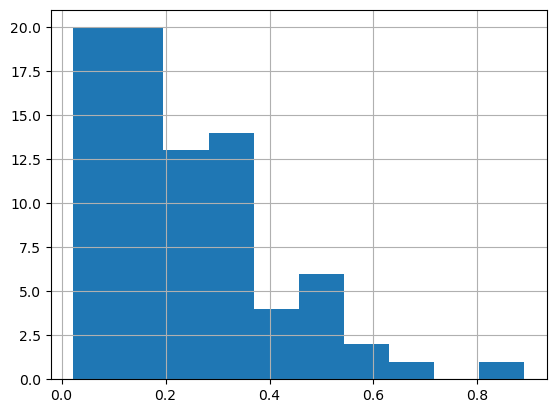

In [21]:
s.hist()

In [22]:
s.quantile(q = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.4    0.190130
0.5    0.210370
0.6    0.253332
0.7    0.310847
0.8    0.338510
0.9    0.502969
dtype: float64

In [23]:
scores.sort(reverse=True)

In [24]:
scores[:10]

[0.8899480700492859,
 0.6734670996665955,
 0.547927975654602,
 0.547927975654602,
 0.5332010984420776,
 0.5296550989151001,
 0.5127754211425781,
 0.5050743818283081,
 0.5029693841934204,
 0.4984135925769806]